In [1644]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1645]:
data = pd.read_csv('data\\data_overview.csv.gz', compression='gzip')

In [1646]:
data.head()

,brand,model,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,metallic,country_origin,first_owner,accident_free,condition,price,currency
0,Abarth,595,2021.0,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,NaN,NaN,NaN,Używane,65000,PLN
1,Abarth,595,2018.0,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,Polska,NaN,Tak,Używane,82999,PLN
2,Abarth,595,2016.0,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,NaN,NaN,NaN,Używane,59900,PLN
3,Abarth,500,2023.0,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,Polska,NaN,Tak,Używane,135000,PLN
4,Abarth,595,2019.0,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,Włochy,NaN,Tak,Używane,79900,PLN


### brand - Brand of the vehicle

In [1647]:
# Count the number of missing values
data['brand'].isna().sum()

4

In [1648]:
# Remove rows with missing values
data = data.dropna(subset=['brand'])

In [1649]:
type_brand = data['brand'].dtype
print(type_brand)

object


In [1650]:
# Display unique values and their counts
unique_brand = data['brand'].value_counts()

unique_brand

brand
BMW           20888
Audi          20575
Ford          19018
Skoda         14266
Renault       13311
              ...  
Omoda             2
Brilliance        1
Jetour            1
Skywell           1
BYD               1
Name: count, Length: 103, dtype: int64

In [1651]:
# Identify brands with counts >= 100
brands_to_keep = unique_brand[unique_brand >= 100].index

# Filter the dataset to keep only these brands
data_filtered = data[data['brand'].isin(brands_to_keep)]

perform one-hot encoding

In [1652]:
# Perform one-hot encoding for the 'brand' column
data = pd.get_dummies(data, columns=['brand'], prefix='', prefix_sep='')

In [1653]:
data.head()

,model,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,595,2021.0,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
1,595,2018.0,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
2,595,2016.0,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
3,500,2023.0,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
4,595,2019.0,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,...,False,False,False,False,False,False,False,False,False,False


### model - Model of the vehicle

In [1654]:
type_brand = data['model'].dtype
print(type_brand)

object


In [1655]:
# Display unique values and their counts
unique_model = data['model'].value_counts()

unique_model

model
Octavia       4833
A4            4711
Seria 3       4361
Focus         4035
Seria 5       4000
              ... 
2105             1
Diablo           1
Murcielago       1
Beta             1
929              1
Name: count, Length: 1274, dtype: int64

Model column has too much unique values, so we decided to remove this variable.

In [1656]:
# Remove the 'model' column
data = data.drop(columns=['model'])

### year_production - Year of production

In [1657]:
# Count the number of missing values
data['year_production'].isna().sum()

0

In [1658]:
type_year_production = data['year_production'].dtype
print(type_year_production)

float64


In [1659]:
# Convert 'year_production' to integer
data['year_production'] = data['year_production'].astype(int)

In [1660]:
# Display unique values and their counts
unique_year_production = data['year_production'].value_counts()

unique_year_production

year_production
2019    14659
2018    14408
2017    13869
2023    13176
2016    12723
        ...  
1937        1
1915        1
1900        1
1939        1
1935        1
Name: count, Length: 90, dtype: int64

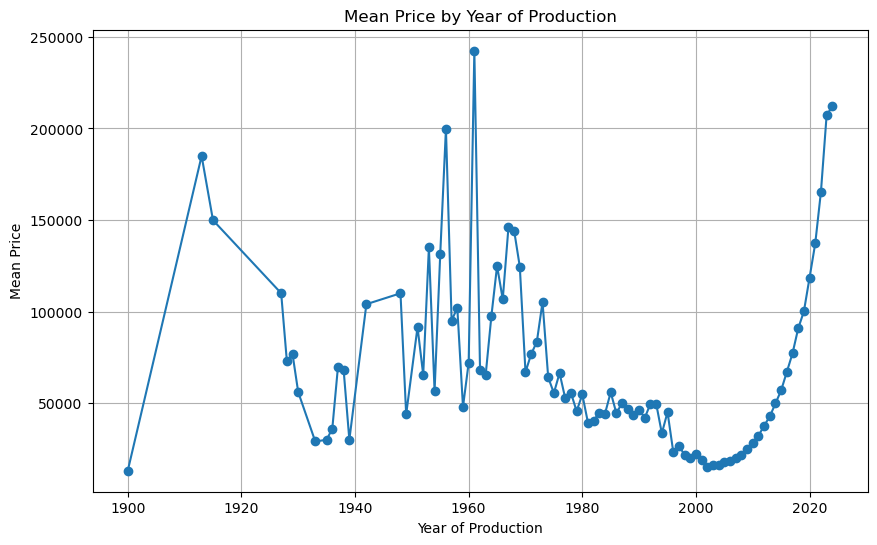

In [1661]:
# change data type as numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Group by 'year_production' and calculate the mean price for each year
mean_price_per_year = data.groupby('year_production')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_price_per_year['year_production'], mean_price_per_year['price'], marker='o')
plt.title('Mean Price by Year of Production')
plt.xlabel('Year of Production')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [1662]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### mileage

In [1663]:
# Count the number of missing values
data['mileage'].isna().sum()

41

In [1664]:
# Remove rows with missing values
data = data.dropna(subset=['mileage'])

In [1665]:
type_mileage = data['mileage'].dtype
print(type_mileage)

object


In [1666]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['mileage'] = data['mileage'].str.replace(' km', '').str.replace(' ', '').astype(int)

# Check the result
print(data['mileage'].head())

0     15900
1     48000
2     54500
3      5578
4    116000
Name: mileage, dtype: int32


In [1667]:
# Display unique values and their counts
unique_mileage = data['mileage'].value_counts()

unique_mileage

mileage
1         6097
5         5114
10        3192
220000    1133
180000    1065
          ... 
27770        1
58722        1
68573        1
216559       1
218876       1
Name: count, Length: 49900, dtype: int64

In [1668]:
# Remove extreme outliers for better visualization
data = data[(data['mileage'] < 800000)]

In [1669]:
# Summary statistics
mileage_stats = data['mileage'].describe()
print(mileage_stats)

count    213899.000000
mean     139499.793215
std       95109.499235
min           1.000000
25%       61284.500000
50%      140000.000000
75%      204700.000000
max      792761.000000
Name: mileage, dtype: float64


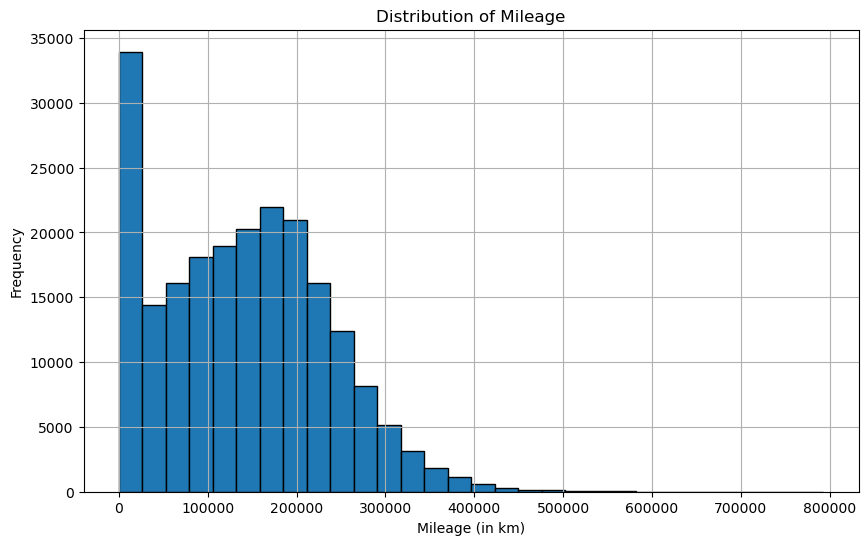

In [1670]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['mileage'], bins=30, edgecolor='black')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (in km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

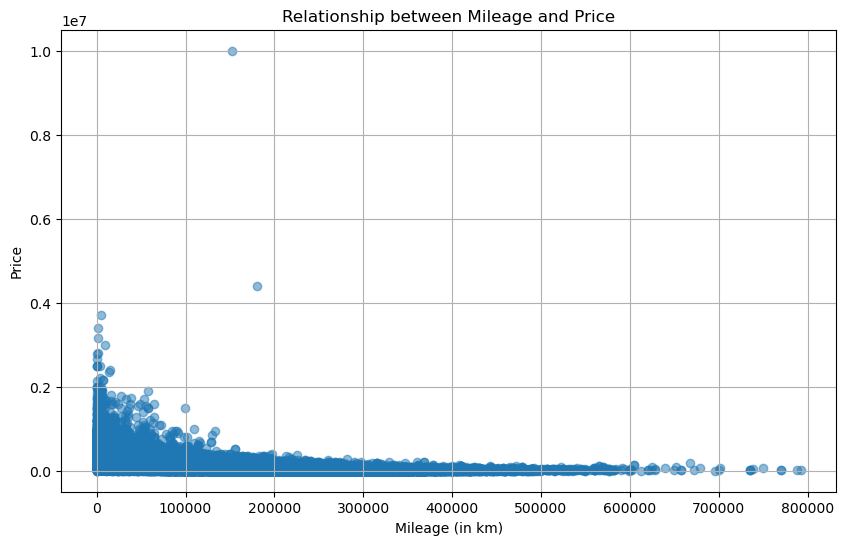

In [1671]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['mileage'], data['price'], alpha=0.5)
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1672]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15900,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48000,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54500,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5578,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116000,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### engine_capacity	- Engine capacity

In [1673]:
# Count the number of missing values
data['engine_capacity'].isna().sum()

4337

In [1674]:
# Remove rows with missing values
data = data.dropna(subset=['engine_capacity'])

In [1675]:
type_engine_capacity = data['engine_capacity'].dtype
print(type_engine_capacity)

object


In [1676]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['engine_capacity'] = data['engine_capacity'].str.replace(' cm3', '').str.replace(' ', '').astype(int)

# Check the result
print(data['engine_capacity'].head())

0    1368
1    1368
2    1368
3    1368
4    1368
Name: engine_capacity, dtype: int32


In [1677]:
# Summary statistics
engine_capacity_stats = data['engine_capacity'].describe()
print(engine_capacity_stats)

count    209562.000000
mean       1915.206550
std         791.388927
min         400.000000
25%        1498.000000
50%        1870.000000
75%        1997.000000
max        8400.000000
Name: engine_capacity, dtype: float64


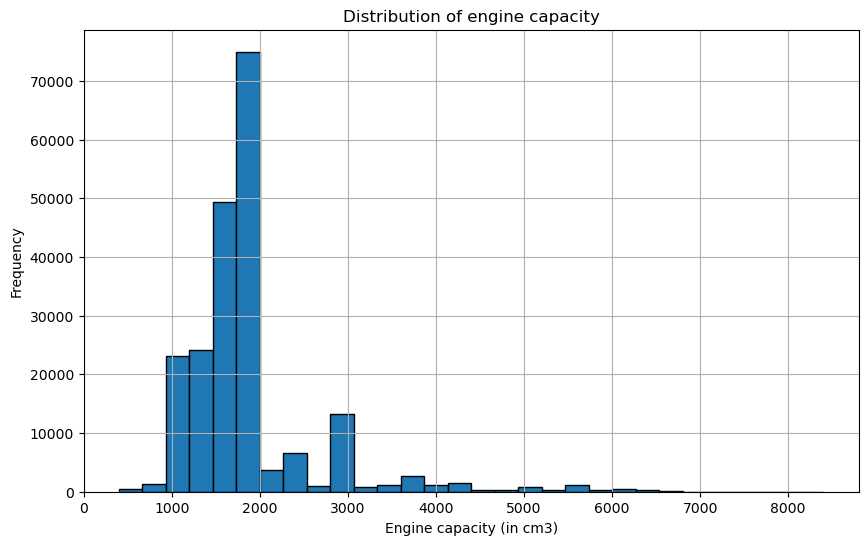

In [1678]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['engine_capacity'], bins=30, edgecolor='black')
plt.title('Distribution of engine capacity')
plt.xlabel('Engine capacity (in cm3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

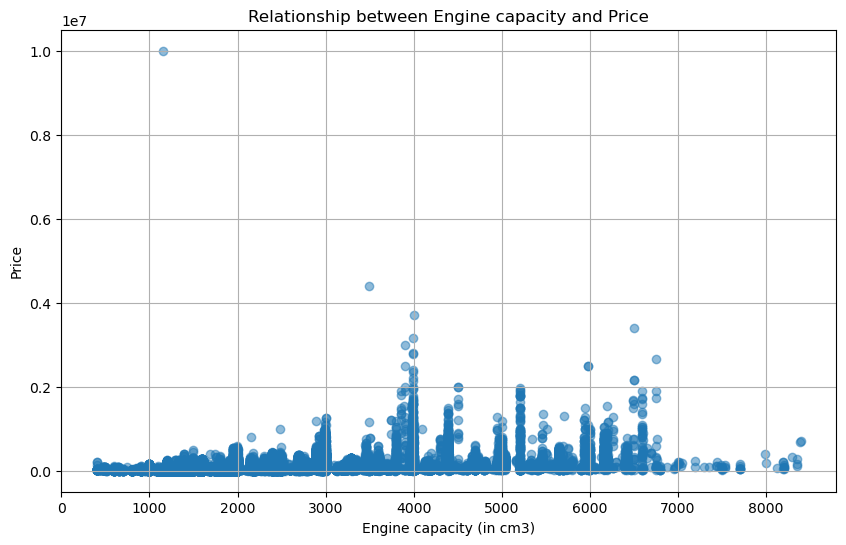

In [1679]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['engine_capacity'], data['price'], alpha=0.5)
plt.title('Relationship between Engine capacity and Price')
plt.xlabel('Engine capacity (in cm3)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1680]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15900,1368,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48000,1368,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54500,1368,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5578,1368,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116000,1368,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### fuel_type - Fuel type

In [1681]:
# Count the number of missing values
data['fuel_type'].isna().sum()

0

In [1682]:
type_fuel_type = data['fuel_type'].dtype
print(type_fuel_type)

object


In [1683]:
# Display unique values and their counts
unique_fuel_type = data['fuel_type'].value_counts()

unique_fuel_type

fuel_type
Benzyna            107406
Diesel              86385
Benzyna+LPG          8574
Hybryda              5245
Hybryda Plug-in      1905
Benzyna+CNG            46
Wodór                   1
Name: count, dtype: int64

In [1684]:
data = data[~data['fuel_type'].isin(['Benzyna+CNG', 'Wodór'])]

perform one-hot encoding

In [1685]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['fuel_type'])

# Remove the 'fuel_type_' prefix from the column names
data.columns = data.columns.str.replace('fuel_type_', '')

In [1686]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,drive_type,body_type,doors,color,metallic,...,Warszawa,Wartburg,Wołga,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in
0,2021,15900,1368,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False
1,2018,48000,1368,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,...,False,False,False,False,False,True,False,False,False,False
2,2016,54500,1368,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,...,False,False,False,False,False,True,False,False,False,False
3,2023,5578,1368,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,...,False,False,False,False,False,True,False,False,False,False
4,2019,116000,1368,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False


### power

In [1687]:
# Count the number of missing values
data['power'].isna().sum()

67

In [1688]:
# Remove rows with missing values
data = data.dropna(subset=['power'])

In [1689]:
type_power = data['power'].dtype
print(type_power)

object


In [1690]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['power'] = data['power'].str.replace(' KM', '').str.replace(' ', '').astype(int)

# Check the result
print(data['power'].head())

0    165
1    145
2    145
3    165
4    165
Name: power, dtype: int32


In [1691]:
# Display unique values and their counts
unique_power = data['power'].value_counts()

unique_power

power
150     18707
140      8531
190      8101
120      7106
130      7062
        ...  
617         1
523         1
2498        1
3           1
567         1
Name: count, Length: 568, dtype: int64

In [1692]:
# Summary statistics 
power_stats = data['power'].describe()
print(power_stats)

count    209448.000000
mean        165.047463
std          87.375716
min           1.000000
25%         114.000000
50%         145.000000
75%         190.000000
max        9999.000000
Name: power, dtype: float64


In [1693]:
# Remove extreme outliers for better visualization
data = data[(data['power'] < 1501) & (data['power'] > 4)]

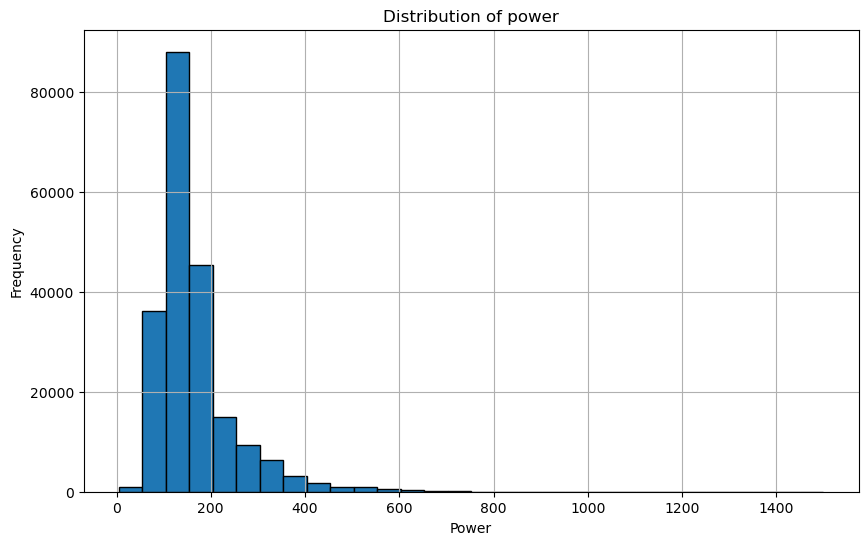

In [1694]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['power'], bins=30, edgecolor='black')
plt.title('Distribution of power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

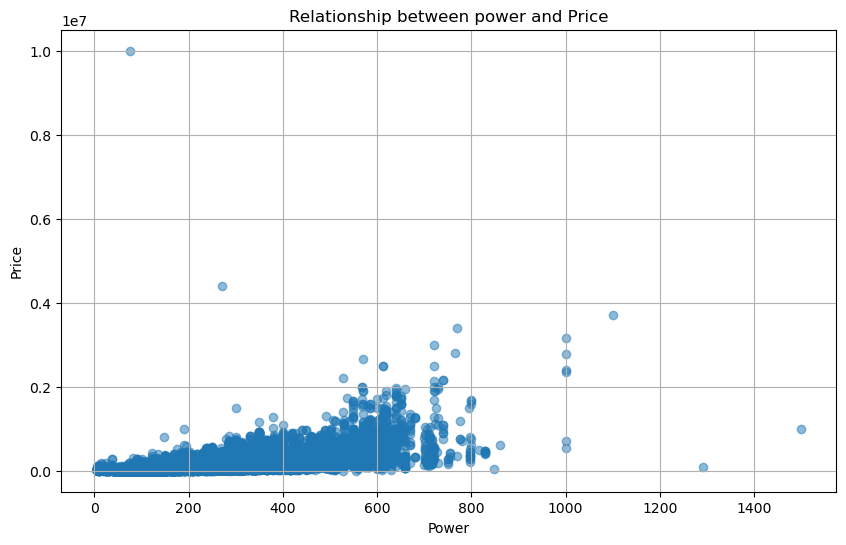

In [1695]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['power'], data['price'], alpha=0.5)
plt.title('Relationship between power and Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1696]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,drive_type,body_type,doors,color,metallic,...,Warszawa,Wartburg,Wołga,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in
0,2021,15900,1368,165,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False
1,2018,48000,1368,145,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,...,False,False,False,False,False,True,False,False,False,False
2,2016,54500,1368,145,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,...,False,False,False,False,False,True,False,False,False,False
3,2023,5578,1368,165,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,...,False,False,False,False,False,True,False,False,False,False
4,2019,116000,1368,165,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False


### gearbox

In [1697]:
# Count the number of missing values
data['gearbox'].isna().sum()

6

In [1698]:
# Remove rows with missing values
data = data.dropna(subset=['gearbox'])

In [1699]:
type_gearbox = data['gearbox'].dtype
print(type_gearbox)

object


In [1700]:
# Display unique values and their counts
unique_gearbox = data['gearbox'].value_counts()

unique_gearbox

gearbox
Manualna        112546
Automatyczna     96844
Name: count, dtype: int64

In [1701]:
# Map the 'gearbox' column to binary values
data['gearbox'] = data['gearbox'].map({'Manualna': 0, 'Automatyczna': 1})

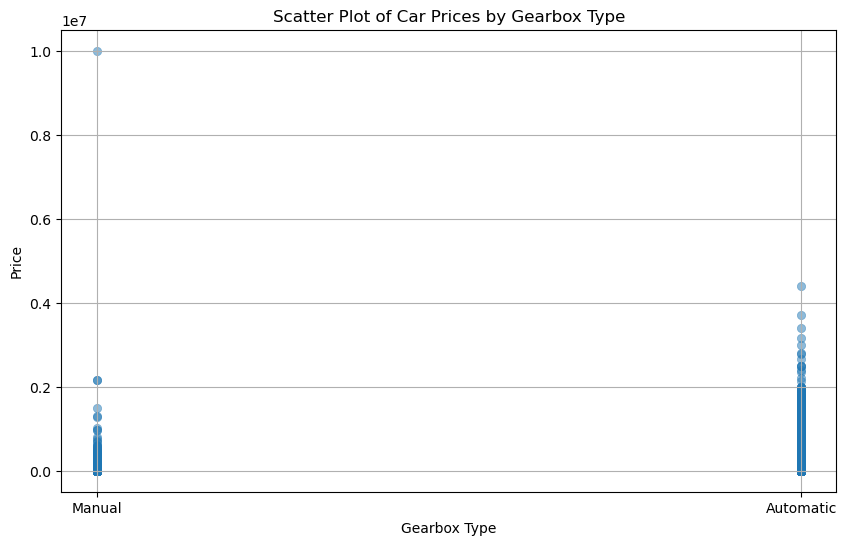

In [1702]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gearbox', y='price', data=data, alpha=0.5, edgecolor=None)
plt.xticks([0, 1], ['Manual', 'Automatic'])
plt.title('Scatter Plot of Car Prices by Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1703]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,drive_type,body_type,doors,color,metallic,...,Warszawa,Wartburg,Wołga,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in
0,2021,15900,1368,165,0,NaN,Auta małe,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False
1,2018,48000,1368,145,0,Na przednie koła,Auta małe,3.0,Biały,NaN,...,False,False,False,False,False,True,False,False,False,False
2,2016,54500,1368,145,0,Na przednie koła,Auta małe,3.0,Czerwony,NaN,...,False,False,False,False,False,True,False,False,False,False
3,2023,5578,1368,165,1,Na przednie koła,Auta małe,3.0,Szary,NaN,...,False,False,False,False,False,True,False,False,False,False
4,2019,116000,1368,165,0,Na przednie koła,Kompakt,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False


### drive_type - Drive type

In [1704]:
# Count the number of missing values
data['drive_type'].isna().sum()

24319

In [1705]:
# Calculate the percentage of missing values
data['drive_type'].isna().sum() / len(data) * 100

11.61421271311906

In [1706]:
# Remove rows with missing values
data = data.dropna(subset=['drive_type'])

In [1707]:
type_drive_type = data['drive_type'].dtype
print(type_drive_type)

object


In [1708]:
# Display unique values and their counts
unique_drive_type = data['drive_type'].value_counts()

unique_drive_type

drive_type
Na przednie koła                 122717
4x4 (stały)                       23126
4x4 (dołączany automatycznie)     21163
Na tylne koła                     13390
4x4 (dołączany ręcznie)            4675
Name: count, dtype: int64

In [1709]:
# First, translate the categories to English
data['drive_type'] = data['drive_type'].replace({
    'Na przednie koła': 'Front_wheel_drive',
    'Na tylne koła': 'Rear_wheel_drive',
    '4x4 (stały)': '4x4',
    '4x4 (dołączany automatycznie)': '4x4',
    '4x4 (dołączany ręcznie)': '4x4'
})

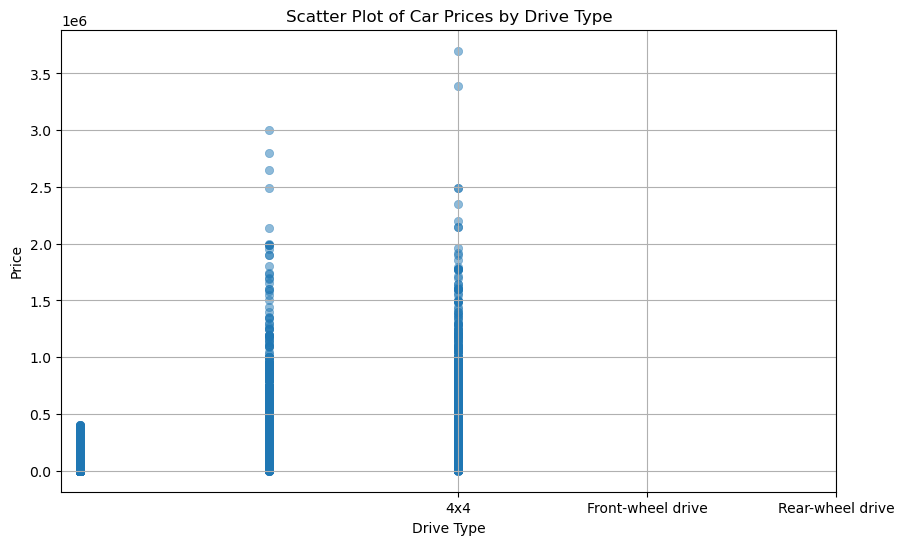

In [1710]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='drive_type', y='price', data=data, alpha=0.5, edgecolor=None)
plt.xticks(['Front-wheel drive', 'Rear-wheel drive', '4x4'])
plt.title('Scatter Plot of Car Prices by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1711]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['drive_type'])

# Remove the prefix from the column names
data.columns = data.columns.str.replace('drive_type_', '')

In [1712]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,body_type,doors,color,metallic,country_origin,...,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in,4x4,Front_wheel_drive,Rear_wheel_drive
1,2018,48000,1368,145,0,Auta małe,3.0,Biały,NaN,Polska,...,False,False,True,False,False,False,False,False,True,False
2,2016,54500,1368,145,0,Auta małe,3.0,Czerwony,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
3,2023,5578,1368,165,1,Auta małe,3.0,Szary,NaN,Polska,...,False,False,True,False,False,False,False,False,True,False
4,2019,116000,1368,165,0,Kompakt,3.0,Niebieski,NaN,Włochy,...,False,False,True,False,False,False,False,False,True,False
5,2022,31190,1368,145,0,Auta małe,3.0,Czerwony,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False


### body_type - Body type

In [1713]:
# Count the number of missing values
data['body_type'].isna().sum()

0

In [1714]:
type_body_type = data['body_type'].dtype
print(type_body_type)

object


In [1715]:
# Display unique values and their counts
unique_body_type = data['body_type'].value_counts()

unique_body_type

body_type
SUV              60618
Kombi            34830
Kompakt          26384
Sedan            23989
Minivan          14005
Auta miejskie     9736
Auta małe         6844
Coupe             6260
Kabriolet         2405
Name: count, dtype: int64

In [1716]:
# First, translate the categories to English
data['body_type'] = data['body_type'].replace({
    'Kombi': 'Combi',
    'Kompakt': 'Compact',
    'Auta miejskie': 'City_cars',
    'Auta małe': 'Small_cars',
    'Kabriolet': 'Cabriolet'
})

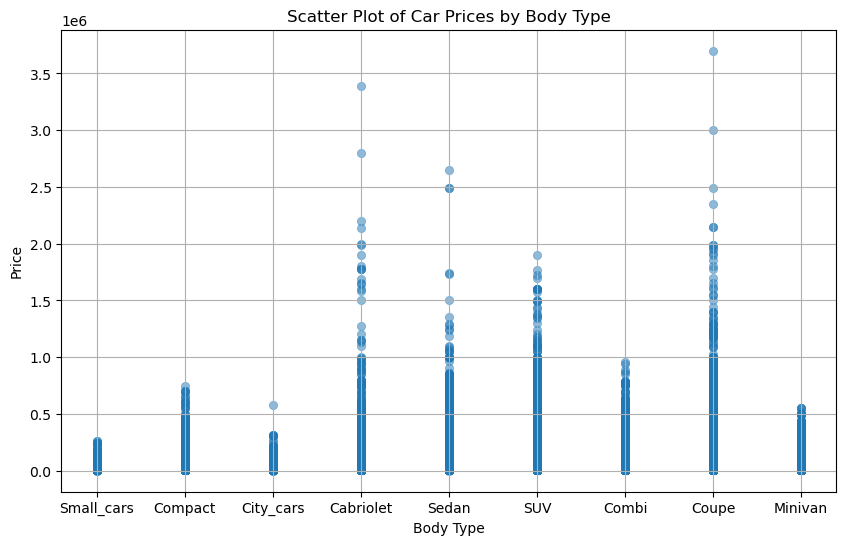

In [1717]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='body_type', y='price', data=data, alpha=0.5, edgecolor=None)
# plt.xticks(['Front-wheel drive', 'Rear-wheel drive', '4x4 (permanent)', '4x4 (automatically engaged)', '4x4 (manually engaged)'])
plt.title('Scatter Plot of Car Prices by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1718]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['body_type'])

# Remove the prefix from the column names
data.columns = data.columns.str.replace('body_type_', '')

In [1719]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,doors,color,metallic,country_origin,first_owner,...,Rear_wheel_drive,Cabriolet,City_cars,Combi,Compact,Coupe,Minivan,SUV,Sedan,Small_cars
1,2018,48000,1368,145,0,3.0,Biały,NaN,Polska,NaN,...,False,False,False,False,False,False,False,False,False,True
2,2016,54500,1368,145,0,3.0,Czerwony,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
3,2023,5578,1368,165,1,3.0,Szary,NaN,Polska,NaN,...,False,False,False,False,False,False,False,False,False,True
4,2019,116000,1368,165,0,3.0,Niebieski,NaN,Włochy,NaN,...,False,False,False,False,True,False,False,False,False,False
5,2022,31190,1368,145,0,3.0,Czerwony,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True


### doors - Number of doors

In [1720]:
# Count the number of missing values
data['doors'].isna().sum()

448

In [1721]:
# Remove rows with missing values
data = data.dropna(subset=['doors'])

In [1722]:
type_doors = data['doors'].dtype
print(type_doors)

float64


In [1723]:
# Convert to integer
data['doors'] = data['doors'].astype(int)

In [1724]:
# Display unique values and their counts
unique_doors = data['doors'].value_counts()

unique_doors

doors
5    150097
4     20114
3      7830
2      6543
6        39
Name: count, dtype: int64

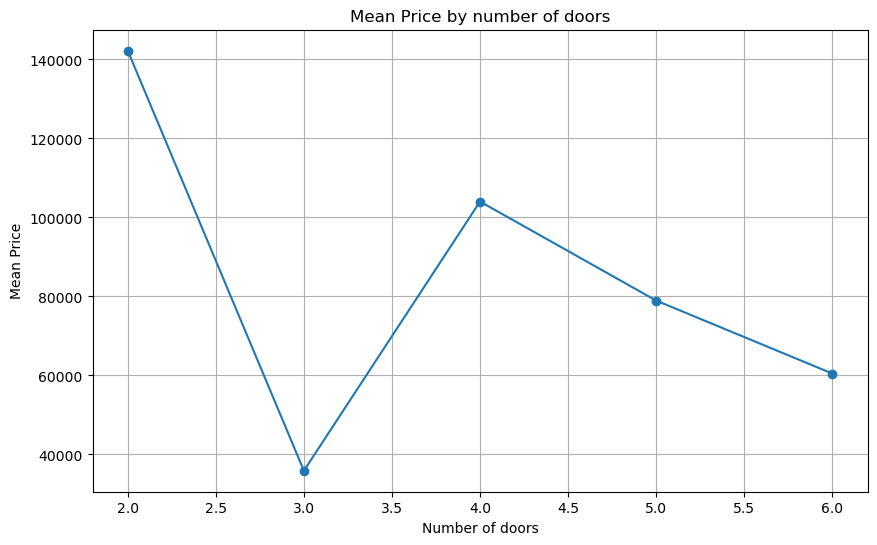

In [1725]:
# Group by 'year_production' and calculate the mean price for each year
mean_price_per_year = data.groupby('doors')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_price_per_year['doors'], mean_price_per_year['price'], marker='o')
plt.title('Mean Price by number of doors')
plt.xlabel('Number of doors')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [1726]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['doors'])

In [1727]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,color,metallic,country_origin,first_owner,accident_free,...,Coupe,Minivan,SUV,Sedan,Small_cars,doors_2,doors_3,doors_4,doors_5,doors_6
1,2018,48000,1368,145,0,Biały,NaN,Polska,NaN,Tak,...,False,False,False,False,True,False,True,False,False,False
2,2016,54500,1368,145,0,Czerwony,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,True,False,False,False
3,2023,5578,1368,165,1,Szary,NaN,Polska,NaN,Tak,...,False,False,False,False,True,False,True,False,False,False
4,2019,116000,1368,165,0,Niebieski,NaN,Włochy,NaN,Tak,...,False,False,False,False,False,False,True,False,False,False
5,2022,31190,1368,145,0,Czerwony,NaN,NaN,NaN,Tak,...,False,False,False,False,True,False,True,False,False,False


### color	

In [1728]:
# Count the number of missing values
data['color'].isna().sum()

0

In [1729]:
type_color = data['color'].dtype
print(type_color)

object


In [1730]:
# Display unique values and their counts
unique_color = data['color'].value_counts()

unique_color

color
Czarny          46009
Szary           31362
Biały           31101
Srebrny         20241
Niebieski       12299
Czerwony         8865
Inny kolor       8340
Granatowy        6100
Brązowy          5103
Zielony          3499
Bordowy          3289
Beżowy           2177
Złoty            2125
Błękitny         1673
Pomarańczowy     1076
Żółty             740
Fioletowy         624
Name: count, dtype: int64

In [1731]:
# First, translate the categories to English
data['color'] = data['color'].replace({
    'Czarny': 'Black',
    'Szary': 'Gray',
    'Biały': 'White',
    'Srebrny': 'Silver',
    'Niebieski': 'Blue',
    'Czerwony': 'Red',
    'Inny kolor': 'Other_color',
    'Granatowy': 'Navy_blue',
    'Brązowy': 'Brown',
    'Zielony': 'Green',
    'Bordowy': 'Burgundy',
    'Beżowy': 'Beige',
    'Złoty': 'Gold',
    'Błękitny': 'Light_blue',
    'Pomarańczowy': 'Orange',
    'Żółty': 'Yellow',
    'Fioletowy': 'Purple'
})

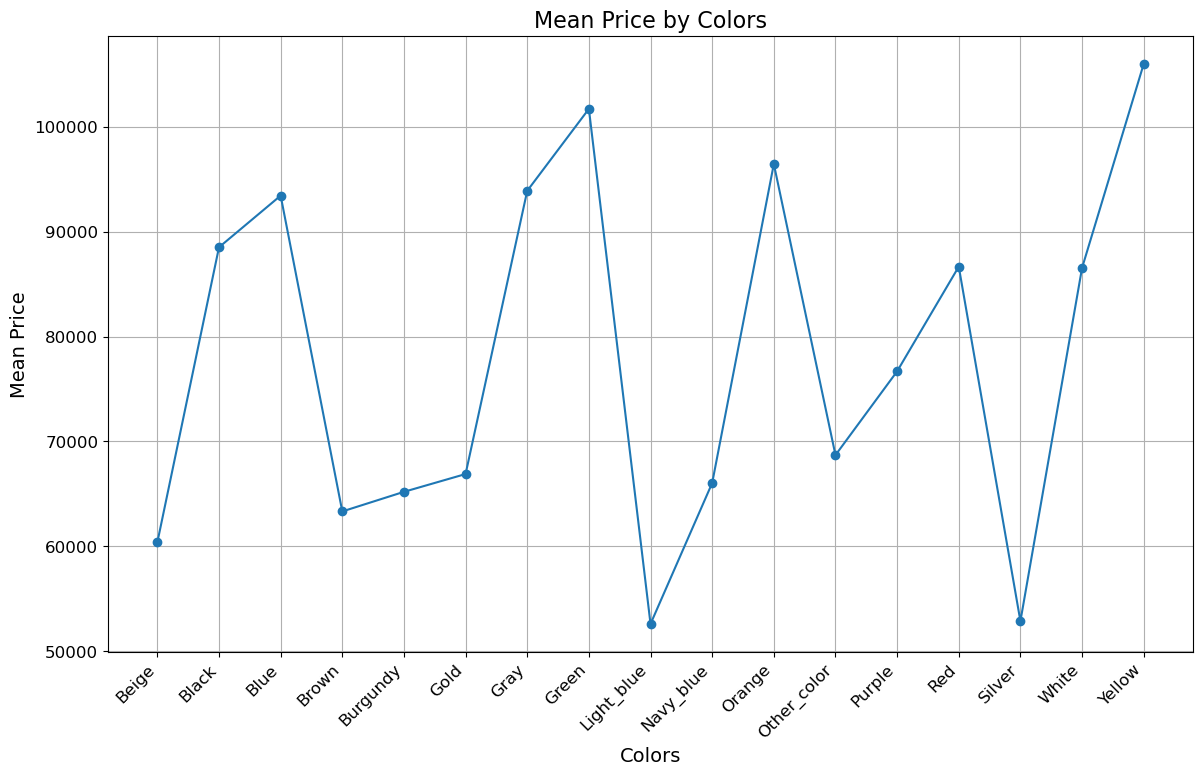

In [1732]:
# Group by 'year_production' and calculate the mean price for each year
mean_price_per_year = data.groupby('color')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility
plt.plot(mean_price_per_year['color'], mean_price_per_year['price'], marker='o')
plt.title('Mean Price by Colors', fontsize=16)
plt.xlabel('Colors', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)
plt.show()

In [1733]:
# Perform one-hot encoding 
data = pd.get_dummies(data, columns=['color'])

# Remove the prefix from the column names
data.columns = data.columns.str.replace('color_', '')

In [1734]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,metallic,country_origin,first_owner,accident_free,condition,...,Green,Light_blue,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow
1,2018,48000,1368,145,0,NaN,Polska,NaN,Tak,Używane,...,False,False,False,False,False,False,False,False,True,False
2,2016,54500,1368,145,0,NaN,NaN,NaN,NaN,Używane,...,False,False,False,False,False,False,True,False,False,False
3,2023,5578,1368,165,1,NaN,Polska,NaN,Tak,Używane,...,False,False,False,False,False,False,False,False,False,False
4,2019,116000,1368,165,0,NaN,Włochy,NaN,Tak,Używane,...,False,False,False,False,False,False,False,False,False,False
5,2022,31190,1368,145,0,NaN,NaN,NaN,Tak,Używane,...,False,False,False,False,False,False,True,False,False,False


### metallic - Metallic paint

In [1735]:
# Count the number of missing values
data['metallic'].isna().sum()

184623

In [1736]:
# Calculate the percentage of missing values
data['metallic'].isna().sum() / len(data) * 100

100.0

Because of 100% missings, decided to remove this feature

In [1737]:
# Remove the 'model' column
data = data.drop(columns=['metallic'])

### country_origin - Country of origin

In [1738]:
# Count the number of missing values
data['country_origin'].isna().sum()

61892

In [1739]:
# Calculate the percentage of missing values
data['country_origin'].isna().sum() / len(data) * 100

33.52345049100058

Because of 33% missings, decided to remove this feature

In [1740]:
# Remove the 'model' column
data = data.drop(columns=['country_origin'])

### first_owner	- First owner

In [1741]:
# Count the number of missing values
data['first_owner'].isna().sum()

184623

In [1742]:
# Calculate the percentage of missing values
data['first_owner'].isna().sum() / len(data) * 100

100.0

Because of 100% missings, decided to remove this feature

In [1743]:
# Remove the 'model' column
data = data.drop(columns=['first_owner'])

### accident_free - Accident-free vehicle

In [1744]:
# Count the number of missing values
data['accident_free'].isna().sum()

74044

In [1745]:
# Calculate the percentage of missing values
data['accident_free'].isna().sum() / len(data) * 100

40.1055123142837

Because of 40% missings, decided to remove this feature

In [1746]:
# Remove the 'model' column
data = data.drop(columns=['accident_free'])

### condition	

In [1747]:
# Count the number of missing values
data['condition'].isna().sum()

0

In [1748]:
type_condition = data['condition'].dtype
print(type_condition)

object


In [1749]:
# Display unique values and their counts
unique_condition = data['condition'].value_counts()

unique_condition

condition
Używane    155019
Nowe        14510
Używany     13772
Nowy         1322
Name: count, dtype: int64

In [1750]:
# First, translate the categories to English
data['condition'] = data['condition'].replace({
    'Używane': 'Used_cars',
    'Nowe': 'New_cars',
    'Używany': 'Used_cars',
    'Nowy': 'New_cars'
})

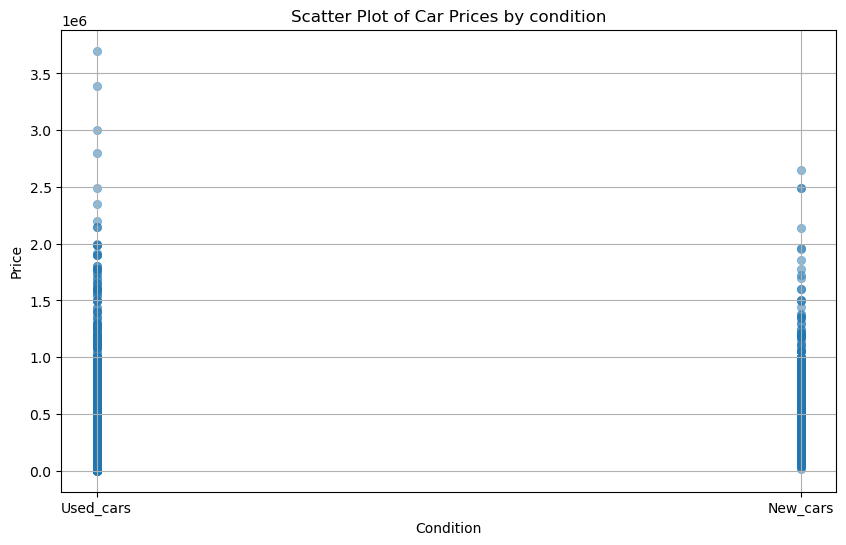

In [1751]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='condition', y='price', data=data, alpha=0.5, edgecolor=None)
plt.title('Scatter Plot of Car Prices by condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1752]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['condition'])

# Remove the prefix from the column names
data.columns = data.columns.str.replace('condition_', '')

In [1753]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,price,currency,Abarth,Acura,Aixam,...,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow,New_cars,Used_cars
1,2018,48000,1368,145,0,82999.0,PLN,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2016,54500,1368,145,0,59900.0,PLN,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2023,5578,1368,165,1,135000.0,PLN,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2019,116000,1368,165,0,79900.0,PLN,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2022,31190,1368,145,0,82000.0,PLN,True,False,False,...,False,False,False,False,True,False,False,False,False,True


### price & currency

In [1754]:
# Count the number of missing values
data['price'].isna().sum()

371

In [1755]:
data['currency'].isna().sum()

0

In [1756]:
# Remove rows with missing values
data = data.dropna(subset=['price'])

In [1757]:
type_price = data['price'].dtype
print(type_price)

float64


In [1758]:
type_currency = data['currency'].dtype
print(type_currency)

object


In [1759]:
# Display unique values and their counts
unique_currency = data['currency'].value_counts()

unique_currency

currency
PLN    184065
EUR       187
Name: count, dtype: int64

convert all prices to PLN

In [1760]:
# Define the exchange rate
eur_to_pln_rate = 4.2077

# Convert prices in EUR to PLN
data.loc[data['currency'] == 'EUR', 'price'] = data.loc[data['currency'] == 'EUR', 'price'] * eur_to_pln_rate

# Update the currency column to PLN
data['currency'] = 'PLN'

# Check the result
data[['price', 'currency']].head()


,price,currency
1,82999.0,PLN
2,59900.0,PLN
3,135000.0,PLN
4,79900.0,PLN
5,82000.0,PLN


In [1761]:
# Convert to integer
data['price'] = data['price'].astype(int)

In [1762]:
# Remove the 'currency' column
data = data.drop(columns=['currency'])

In [1763]:
# Display unique values and their counts
unique_price = data['price'].value_counts()

unique_price

price
29900     1688
39900     1641
49900     1584
19900     1484
59900     1451
          ... 
205999       1
150950       1
170950       1
200950       1
61050        1
Name: count, Length: 10804, dtype: int64

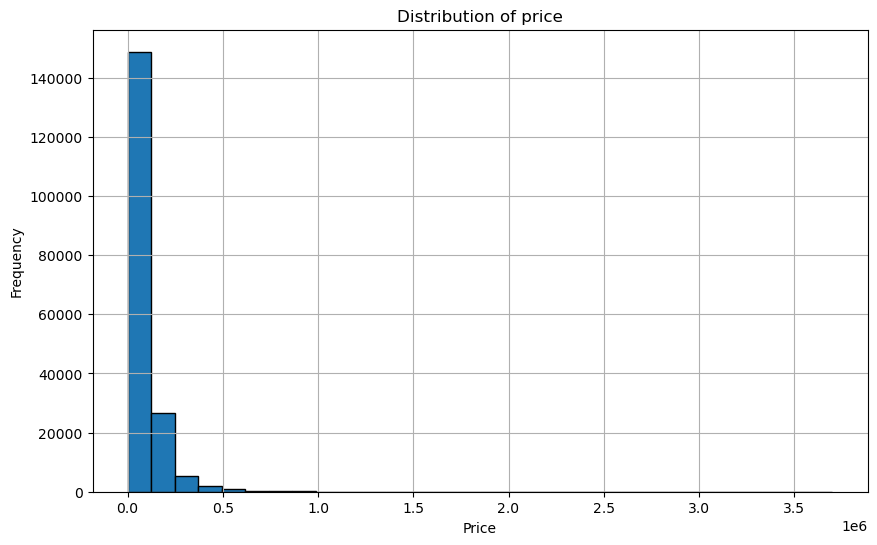

In [1764]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [1765]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,price,Abarth,Acura,Aixam,Alfa Romeo,...,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow,New_cars,Used_cars
1,2018,48000,1368,145,0,82999,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2016,54500,1368,145,0,59900,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2023,5578,1368,165,1,135000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2019,116000,1368,165,0,79900,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2022,31190,1368,145,0,82000,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


Write the cleaned data frame to a new CSV file

In [1766]:
data.to_csv('data\\cleaned_data.csv.gz', index=False, compression='gzip')